## K-Mode Clustering Implementation 

K-Modes Clustering is used for clustering categorical data. It's also from K-Means Clustering family.

### Install kmodes library if not present 

In [14]:
# !pip3 install kmodes

### Import Libraries 

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly as py
import plotly.graph_objs as go

from sklearn.preprocessing import LabelEncoder
from kmodes.kmodes import KModes

import warnings
warnings.filterwarnings("ignore")

### Load data 

In [21]:
bank_data = pd.read_csv("bank.csv",sep=";")

In [22]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


### Data Cleaning 

Let's drop numeric columns as we'll be dealing with only categorical features here.

In [23]:
# drop balance, day, duration, campaign, pdays and previous columns.

bank_data.drop(['balance','day','duration','campaign','pdays','previous'],axis=1,inplace=True)

In [24]:
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,30,unemployed,married,primary,no,no,no,cellular,oct,unknown,no
1,33,services,married,secondary,no,yes,yes,cellular,may,failure,no
2,35,management,single,tertiary,no,yes,no,cellular,apr,failure,no
3,30,management,married,tertiary,no,yes,yes,unknown,jun,unknown,no
4,59,blue-collar,married,secondary,no,yes,no,unknown,may,unknown,no


We still have age column which is numeric but we can convert it to categorical by creating bins.

In [25]:
bank_data['age_bin'] = pd.cut(bank_data['age'],[0, 20, 30, 40, 50, 60, 70, 80, 90, 100],labels=['0-20', '20-30', '30-40', '40-50','50-60','60-70','70-80', '80-90','90-100'])

In [26]:
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,poutcome,y,age_bin
0,30,unemployed,married,primary,no,no,no,cellular,oct,unknown,no,20-30
1,33,services,married,secondary,no,yes,yes,cellular,may,failure,no,30-40
2,35,management,single,tertiary,no,yes,no,cellular,apr,failure,no,30-40
3,30,management,married,tertiary,no,yes,yes,unknown,jun,unknown,no,20-30
4,59,blue-collar,married,secondary,no,yes,no,unknown,may,unknown,no,50-60


In [27]:
# drop original age column

bank_data.drop('age',axis=1,inplace=True)

In [28]:
bank_data.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y,age_bin
0,unemployed,married,primary,no,no,no,cellular,oct,unknown,no,20-30
1,services,married,secondary,no,yes,yes,cellular,may,failure,no,30-40
2,management,single,tertiary,no,yes,no,cellular,apr,failure,no,30-40
3,management,married,tertiary,no,yes,yes,unknown,jun,unknown,no,20-30
4,blue-collar,married,secondary,no,yes,no,unknown,may,unknown,no,50-60


### Let's Encode Data to Numeric 

In [29]:
le = LabelEncoder()

In [30]:
cleaned_data = bank_data.apply(le.fit_transform)

In [32]:
cleaned_data.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y,age_bin
0,10,1,0,0,0,0,0,10,3,0,1
1,7,1,1,0,1,1,0,8,0,0,2
2,4,2,2,0,1,0,0,0,0,0,2
3,4,1,2,0,1,1,2,6,3,0,1
4,1,1,1,0,1,0,2,8,3,0,4


### Train our Model 

In [33]:
# Train with default parameters
kmode = KModes()

In [34]:
kmode.fit(cleaned_data)

KModes()

In [36]:
labels = kmode.labels_
labels

array([2, 0, 0, ..., 3, 4, 2], dtype=uint16)

In [38]:
kmode.cluster_centroids_

array([[4, 1, 1, 0, 1, 0, 0, 8, 3, 0, 2],
       [9, 2, 2, 0, 0, 0, 2, 6, 3, 0, 4],
       [1, 1, 0, 0, 0, 1, 0, 5, 3, 0, 3],
       [4, 1, 2, 0, 0, 0, 0, 1, 3, 0, 3],
       [0, 2, 1, 0, 0, 0, 0, 5, 3, 0, 1],
       [1, 1, 1, 0, 1, 0, 2, 8, 3, 0, 3],
       [5, 1, 0, 0, 0, 0, 1, 5, 3, 0, 4],
       [1, 1, 3, 0, 0, 0, 0, 4, 3, 0, 4]])

### Lets Tune Our Model to Choose Best Value of K 

In [43]:
cost = []

for n_cluster in range(1 , 20):
    kmode = KModes(
        n_clusters=n_cluster,
        max_iter=100,
        init='Cao',
        n_init=1,
        verbose=1,
        random_state=42,
        n_jobs=1)
    kmode.fit_predict(cleaned_data)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 19026.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 453, cost: 16754.0
Run 1, iteration: 2/100, moves: 469, cost: 16596.0
Run 1, iteration: 3/100, moves: 106, cost: 16596.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 424, cost: 16284.0
Run 1, iteration: 2/100, moves: 288, cost: 16284.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 756, cost: 15171.0
Run 1, iteration: 2/100, moves: 195, cost: 15171.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1000, cost: 14464.0
Run 1, iteration: 2/100, moves: 47, cost: 14464.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, itera

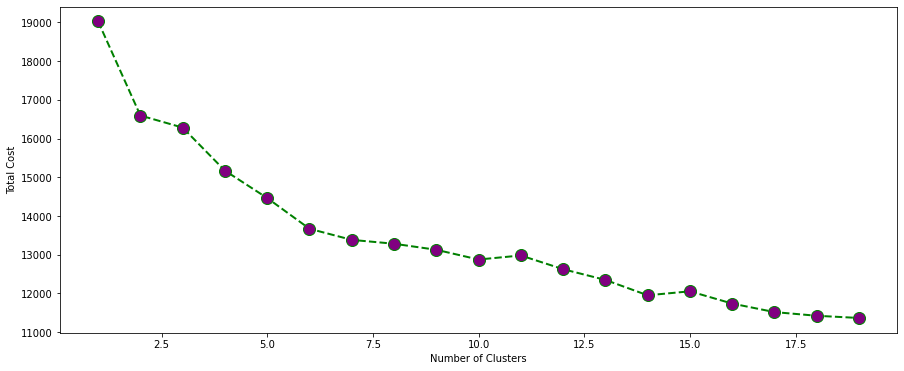

In [44]:
# Lets draw elbow plot
plt.figure(1 , figsize = (15 ,6))

plt.plot(np.arange(1 , 20) , cost, color='green', marker='o', linestyle='dashed',linewidth=2, markersize=12,markerfacecolor='purple')
plt.xlabel('Number of Clusters') , plt.ylabel('Total Cost')
plt.show()

K=2 and 3 look like good choice to create clusters.

In [45]:
# Let's create 2 clusters.

kmode = KModes(n_clusters=2,random_state=42)
kmode.fit(cleaned_data)

KModes(n_clusters=2, random_state=42)

### Let's add cluster labels to our original dataframe 

In [46]:
labels = kmode.labels_

In [47]:
bank_data['cluster'] = labels

In [48]:
bank_data.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y,age_bin,cluster
0,unemployed,married,primary,no,no,no,cellular,oct,unknown,no,20-30,0
1,services,married,secondary,no,yes,yes,cellular,may,failure,no,30-40,0
2,management,single,tertiary,no,yes,no,cellular,apr,failure,no,30-40,1
3,management,married,tertiary,no,yes,yes,unknown,jun,unknown,no,20-30,0
4,blue-collar,married,secondary,no,yes,no,unknown,may,unknown,no,50-60,0


We can check variables now using plots to see how clusters look like.